# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [68]:
import pandas as pd

## imports for Python, Pandas

In [69]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [70]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [71]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [72]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [73]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [74]:
pd.reset_option("^display")
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

### 1. Find the 10 countries with most projects

In [75]:
json_orig_df = pd.read_json('data/world_bank_projects.json')
json_orig_df.head(5)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


First question is asking us to find the 10 countries with the most projects. To get a better idea of where to start, we're going to start by looking at some more background information regarding the data we're working with (i.e. column names, info(), etc.)

In [76]:
a = json_orig_df
a.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

The first columns of importance are country_namecode, countrycode, countryname and countryshortname.

In [77]:
import matplotlib.pyplot as plt
b = a.countryshortname.value_counts().head(10)
b1 = b.reset_index()
b1.columns = ['Country', 'Count']
rank_list = list(range(1, 11))
b1['rank'] = rank_list
b1 = b1.set_index('rank')
b1

,Country,Count
rank,,
1,China,19
2,Indonesia,19
3,Vietnam,17
4,India,16
5,"Yemen, Republic of",13
6,Nepal,12
7,Morocco,12
8,Bangladesh,12
9,Mozambique,11


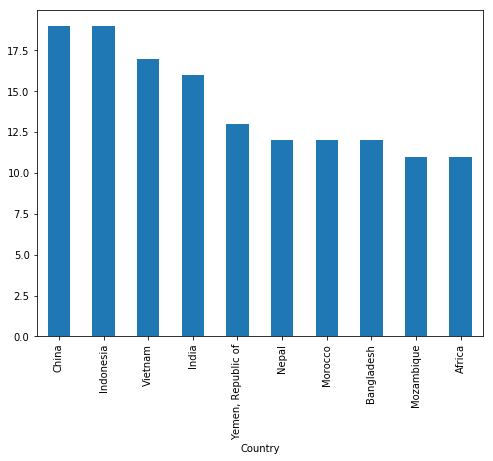

In [78]:
b1.plot(kind = 'bar', x = 'Country', figsize=(8,6), legend=False)

So we've got a list of the top ten countries yet at #9 the country is listed as Africa. This is a continent, so some further investigation is needed to determine what is going on here.

In [80]:
from IPython.display import display
africa = a[a.countryshortname == 'Africa']
pd.options.display.max_columns = None
africa

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,docty,envassesmentcategorycode,grantamt,ibrdcommamt,id,idacommamt,impagency,lendinginstr,lendinginstrtype,lendprojectcost,majorsector_percent,mjsector_namecode,mjtheme,mjtheme_namecode,mjthemecode,prodline,prodlinetext,productlinetype,project_abstract,project_name,projectdocs,projectfinancialtype,projectstatusdisplay,regionname,sector,sector1,sector2,sector3,sector4,sector_namecode,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
45,{'$oid': '52b213b38594d8a2be17c7ad'},2014,September,2013-09-12T00:00:00Z,ECOWAS,NaN,Africa!$!3A,3A,Africa,Africa,"Project Information Document,Integrated Safegu...",C,10000000,0,P125018,0,WAHO,Investment Project Financing,IN,10750000,"[{'Percent': 100, 'Name': 'Health and other so...","[{'code': 'JX', 'name': 'Health and other soci...",[Human development],"[{'code': '8', 'name': 'Human development'}, {...","8,10",RE,Recipient Executed Activities,L,NaN,West Africa Regional Disease Surveillance Cap...,"[{'DocDate': '28-MAR-2013', 'EntityID': '09022...",OTHER,Active,Africa,[{'Name': 'Health'}],"{'Percent': 100, 'Name': 'Health'}",NaN,NaN,NaN,"[{'code': 'JA', 'name': 'Health'}]",JA,IBRD,Active,N,"{'Percent': 100, 'Name': 'Health system perfor...","[{'code': '67', 'name': 'Health system perform...",67,0,10000000,http://www.worldbank.org/projects/P125018/west...
46,{'$oid': '52b213b38594d8a2be17c7ae'},2014,September,2013-09-10T00:00:00Z,UGANDA-COMOROS,2018-06-30T00:00:00Z,Africa!$!3A,3A,Africa,Africa,"Financing Agreement,Disbursement Letter,Projec...",B,0,0,P118213,22000000,RELEVANT MINISTRIES IN CHARGE OF TELECOM/ICT P...,Adaptable Program Loan,IN,22000000,"[{'Percent': 60, 'Name': 'Information and comm...","[{'code': 'CX', 'name': 'Information and commu...","[Public sector governance, Rural development, ...","[{'code': '2', 'name': 'Public sector governan...","2,10,4,4",PE,IBRD/IDA,L,{'cdata': 'The development objectives of Fourt...,RCIP4 - Regional Communications Infrastructure...,"[{'DocDate': '24-SEP-2013', 'EntityID': '09022...",IDA,Active,Africa,"[{'Name': 'Telecommunications'}, {'Name': 'Inf...","{'Percent': 60, 'Name': 'Telecommunications'}","{'Percent': 30, 'Name': 'Information technology'}","{'Percent': 10, 'Name': 'Public administration...",NaN,"[{'code': 'CT', 'name': 'Telecommunications'},...","BM,CA,CT",IBRD,Active,N,"{'Percent': 20, 'Name': 'Administrative and ci...","[{'code': '25', 'name': 'Administrative and ci...","39,40,78,25",22000000,22000000,http://www.worldbank.org/projects/P118213/rcip...
51,{'$oid': '52b213b38594d8a2be17c7b3'},2014,September,2013-09-04T00:00:00Z,"OSS, IUCN, CILSS",NaN,Africa!$!3A,3A,Africa,Africa,"Project Appraisal Document,Project Information...",C,4630000,0,P130888,0,"OSS, IUCN, CILSS/AGRYHMET",Specific Investment Loan,IN,4630000,"[{'Percent': 50, 'Name': 'Water, sanitation an...","[{'code': 'WX', 'name': 'Water, sanitation and...","[Environment and natural resources management,...","[{'code': '11', 'name': 'Environment and natur...","11,11,11,11,11",GE,Global Environment Project,L,{'cdata': 'The objective of the Building Resil...,"Building Resilience through Innovation, Commun...","[{'DocDate': '09-AUG-2013', 'EntityID': '00033...",OTHER,Active,Africa,"[{'Name': 'General water, sanitation and flood...","{'Percent': 50, 'Name': 'General water, sanita...","{'Percent': 20, 'Name': 'General agriculture, ...","{'Percent': 20, 'Name': 'Agricultural extensio...","{'Percent': 10, 'Name': 'Irrigation and draina...","[{'code': 'WZ', 'name': 'General water, sanita...","AI,AB,AZ,WZ",IBRD,Active,N,"{'Percent': 20, 'Name': 'Biodiversity'}","[{'code': '80', 'name': 'Biodiversity'}, {'cod...","85,82,81,83,80",0,4630000,http://www.worldbank.org/projects/P130888/buil...
58,{'$oid': '52b213b38594d8a2be17c7ba'},2014,August,2013-08-28T00:00:00Z,BANK EXECUTED,NaN,Africa!$!3A,3A,Africa,Africa,Na

So from the looks of it, the borrower column may provide some clues as to exactly which country each observation corresponds to. From this column we can gather that there are a few countries listed: Uganda, Burundi, Rwanda, Tanzania, Mali, Malawi, Mozambique, Zambia and Niger. However, we shouldn't stop there. Why are there multiple countries listed in the borrower columns for these particular observations? As it happens, there is a column, project_name, that may be able to help us out. 

In [81]:
borrower = africa[['borrower', 'project_name']]
borrower

,borrower,project_name
45,ECOWAS,West Africa Regional Disease Surveillance Cap...
46,UGANDA-COMOROS,RCIP4 - Regional Communications Infrastructure...
51,"OSS, IUCN, CILSS","Building Resilience through Innovation, Commun..."
58,BANK EXECUTED,Fighting against wildlife poaching and illegal...
65,"BURUNDI,RWANDA,TANZANIA",Regional Rusumo Falls Hydroelectric Project
99,GOVERNMENT OF MALI,Additional Financing-West Africa Agricultural ...
167,MINISTRIES OF TELECOM AND ICT,West Africa Regional Communications Infrastruc...
184,TANZANIA,Southern Africa Trade and Transport Facilitati...
287,"MALAWI, MOZAMBIQUE, ZAMBIA",Agricultural Productivity Program for Southern...
353,NILE BASIN INITIATIVE,Nile Cooperation for Results Project


Looking in the project_name column, now we can get a little clarity as to why 'Africa' was listed as a country. It looks like most of these projects were regionally-based, with multiple African countries involved. 

1. ECOWAS - Economic Community of West African States (Cape Verde, Gambia, Guinea, Guinea-Bissau, Liberia, Mali, Senegal, Sierra Leone, Benin, Burkina Faso, Ghana, Ivory Coast, Niger, Nigeria, Togo)
2. Uganda (country in East-Central Africa), Comoros (island country off the eastern coast of Afica)
3. 
### WILL CONTINUE DEVELOPING

### 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [82]:
pd.reset_option("^display")
from IPython.display import display
import pandas as pd

a = json.load((open('data/world_bank_projects.json')))

In [83]:
type(a)

list

In [84]:
a1 = json_normalize(a, 'mjtheme_namecode')
a1.head(10)

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [85]:
len(a1)

1499

In [86]:
a1_counts = a1.code.value_counts().reset_index()
a1_counts.columns = ['Code #', 'Count']
a1_counts

,Code #,Count
0,11,250
1,10,216
2,8,210
3,2,199
4,6,168
5,4,146
6,7,130
7,5,77
8,9,50
9,1,38


In [108]:
a1[a1.code == '11'].head(2)

,code,name
1,11,
6,11,Environment and natural resources management


In [87]:
a1[a1.code == '10'].head(2)

,code,name
18,10,Rural development
23,10,Rural development


In [88]:
a1[a1.code == '8'].head(2)

,code,name
0,8,Human development
17,8,


In [89]:
a1[a1.code == '2'].head(2)

,code,name
5,2,Public sector governance
14,2,Public sector governance


In [90]:
a1[a1.code == '6'].head(2)

,code,name
3,6,Social protection and risk management
7,6,Social protection and risk management


In [91]:
a1[a1.code == '4'].head(2)

,code,name
11,4,Financial and private sector development
15,4,Financial and private sector development


In [92]:
a1[a1.code == '7'].head(2)

,code,name
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [93]:
a1[a1.code == '5'].head(2)

,code,name
4,5,Trade and integration
10,5,Trade and integration


In [94]:
a1[a1.code == '9'].head(2)

,code,name
53,9,Urban development
183,9,Urban development


In [95]:
a1[a1.code == '1'].head(2)

,code,name
2,1,Economic management
88,1,Economic management


In [96]:
a1[a1.code == '3'].head(2)

,code,name
252,3,Rule of law
359,3,Rule of law


### 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [98]:
import pandas as pd

q3_df = pd.read_json('data/world_bank_projects.json')
q3_df.head(3)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en


In [100]:
q3_list = json.load((open('data/world_bank_projects.json')))
type(q3_list)

list

In [107]:
import numpy as np
a1_fix = a1.replace('', np.nan)
a1_fix.isnull().sum()

code      0
name    122
dtype: int64

In [114]:
type(a1_fix.iloc[1,1])

float

In [132]:
mask_11 = (a1_fix.name.isnull()) & (a1_fix.code == '11')
a1_fix.loc[mask_11, 'name'] = a1_fix.loc[mask_11, 'name'].apply(lambda x: 'Environment and natural resources management')
a1_fix.head(2)

,code,name
0,8,Human development
1,11,Environment and natural resources management


In [133]:
a1_fix.isnull().sum()

code     0
name    95
dtype: int64

In [135]:
a1_fix[a1_fix.isnull().any(axis=1)]

,code,name
13,6,NaN
17,8,NaN
19,7,NaN
24,2,NaN
29,4,NaN
40,2,NaN
42,7,NaN
80,4,NaN
100,7,NaN
107,4,NaN
